In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

In [67]:
# Load the dataset
model_input = catalog.load("model_input")
model_input.info()

2023-05-08 06:47:01,212 - kedro.io.data_catalog - INFO - Loading data from 'model_input' (CSVDataSet)...
<class 'pandas.core.frame.DataFrame'>
Index: 1128 entries, 41 to 2334
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Q16a                         1128 non-null   float64
 1   Q16b                         1128 non-null   float64
 2   Q16c                         1128 non-null   float64
 3   Q16d                         1128 non-null   float64
 4   Q16e                         1128 non-null   float64
 5   Q16f                         1128 non-null   float64
 6   Q16g                         1128 non-null   float64
 7   Q16h                         1128 non-null   float64
 8   Q16i                         1128 non-null   float64
 9   Q17a                         1128 non-null   float64
 10  Q17b                         1128 non-null   float64
 11  Q17c                         1128

In [68]:
model_input.columns

Index(['Q16a', 'Q16b', 'Q16c', 'Q16d', 'Q16e', 'Q16f', 'Q16g', 'Q16h', 'Q16i',
       'Q17a', 'Q17b', 'Q17c', 'Q17d', 'Q18', 'Q20', 'Q22',
       'min_annual_return', 'min_risk_premium_to_bet',
       'risk_premium_normalised', 'risk_aversion', 'gambling_variety', 'Q15a',
       'Q15b', 'Q15c', 'Q15d', 'Q15e', 'Q15f', 'Q15g', 'Q15h', 'Q15i',
       'gambling_problem', 'gambling_problem_normalised',
       'gambling_problem_binary'],
      dtype='object')

In [69]:
# Select model input variables
model_input = model_input[['Q18','Q20','min_annual_return', 'risk_aversion', 'gambling_variety', 'gambling_problem_binary']]

In [70]:
# Data Exploration

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

In [71]:
# Summary statistics
model_input.describe()

,Q18,Q20,min_annual_return,risk_aversion,gambling_variety,gambling_problem_binary
count,1128.000000,1128.000000,1128.000000,1128.000000,1128.000000,1128.000000
mean,5.581560,6.617908,0.246817,0.961879,2.467199,0.192376
std,2.121529,1.996963,0.220743,0.449155,1.429436,0.394342
min,0.000000,0.000000,0.030000,0.000000,1.000000,0.000000
25%,4.000000,5.000000,0.120000,1.000000,1.000000,0.000000
50%,6.000000,7.000000,0.120000,1.000000,2.000000,0.000000
75%,7.000000,8.000000,0.390000,1.000000,3.000000,0.000000
max,10.000000,10.000000,0.850000,2.000000,9.000000,1.000000


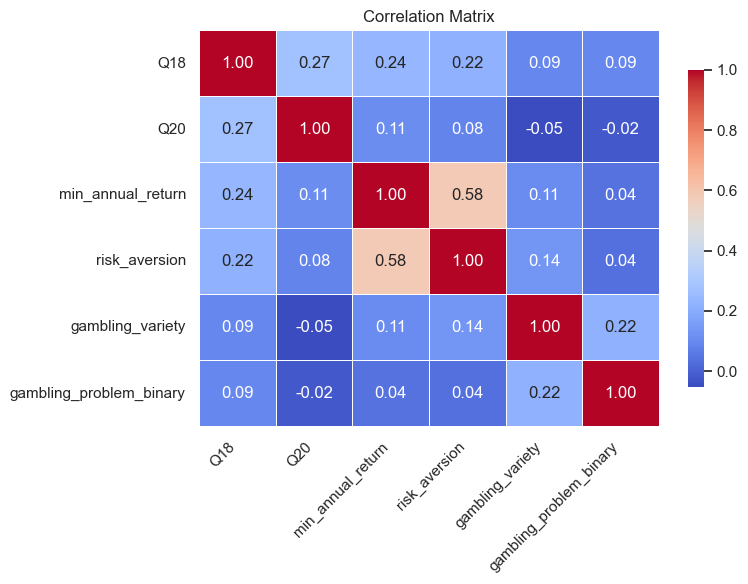

In [72]:
# Calculate the correlation matrix
correlation_matrix = model_input.corr()

# Visualize the correlation matrix using Matplotlib and Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f", cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [73]:
"""
# Discretize continuous variables for association mining
iris_discrete = model_input.copy()
iris_discrete['sepal length (cm)'] = pd.qcut(model_input['sepal length (cm)'], 4, labels=False)
iris_discrete['sepal width (cm)'] = pd.qcut(model_input['sepal width (cm)'], 4, labels=False)
iris_discrete['petal length (cm)'] = pd.qcut(model_input['petal length (cm)'], 4, labels=False)
iris_discrete['petal width (cm)'] = pd.qcut(model_input['petal width (cm)'], 4, labels=False)

# Prepare dataset for Apriori algorithm
transaction_data = iris_discrete.applymap(str).values.tolist()
te = TransactionEncoder()
te_array = te.fit(transaction_data).transform(transaction_data)
transaction_df = pd.DataFrame(te_array, columns=te.columns_)

# Apply Apriori algorithm for association mining
min_support = 0.1
frequent_itemsets = apriori(transaction_df, min_support=min_support, use_colnames=True)
print(frequent_itemsets)
"""



"\n# Discretize continuous variables for association mining\niris_discrete = model_input.copy()\niris_discrete['sepal length (cm)'] = pd.qcut(model_input['sepal length (cm)'], 4, labels=False)\niris_discrete['sepal width (cm)'] = pd.qcut(model_input['sepal width (cm)'], 4, labels=False)\niris_discrete['petal length (cm)'] = pd.qcut(model_input['petal length (cm)'], 4, labels=False)\niris_discrete['petal width (cm)'] = pd.qcut(model_input['petal width (cm)'], 4, labels=False)\n\n# Prepare dataset for Apriori algorithm\ntransaction_data = iris_discrete.applymap(str).values.tolist()\nte = TransactionEncoder()\nte_array = te.fit(transaction_data).transform(transaction_data)\ntransaction_df = pd.DataFrame(te_array, columns=te.columns_)\n\n# Apply Apriori algorithm for association mining\nmin_support = 0.1\nfrequent_itemsets = apriori(transaction_df, min_support=min_support, use_colnames=True)\nprint(frequent_itemsets)\n"

In [74]:
X = model_input[['Q18','Q20','min_annual_return', 'risk_aversion', 'gambling_variety']]
y = model_input["gambling_problem_binary"]

In [75]:
# Standardise the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [76]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [77]:
# Perform cross-validation and model selection
# Set up a parameter grid for the SVM
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']}

# Perform a grid search with cross-validation
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=5)
grid.fit(X_train, y_train)

# Print best parameters
print("Best parameters found: ", grid.best_params_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01

In [78]:
# Train the SVM model with the best parameters
svm_model = SVC(C=grid.best_params_['C'], gamma=grid.best_params_['gamma'], kernel=grid.best_params_['kernel'])
svm_model.fit(X_train, y_train)



SVC(C=10, gamma=0.1)

In [79]:
# Make predictions and evaluate the model
y_pred = svm_model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Confusion Matrix:
[[265  14]
 [ 56   4]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.95      0.88       279
         1.0       0.22      0.07      0.10        60

    accuracy                           0.79       339
   macro avg       0.52      0.51      0.49       339
weighted avg       0.72      0.79      0.75       339

Accuracy Score:  0.7935103244837758


In [80]:
# Visualize the decision boundaries (for a 2D representation, we'll use the first two features):

def plot_decision_boundaries(X, y, model, features):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k', marker='o', s=70)
    plt.xlabel(features[0])
    plt.ylabel(features[1])
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title('Decision Boundaries')
    plt.legend(*scatter.legend_elements(), title="Classes")
    plt.show()

# Visualize decision boundaries using the first two standardized features
plot_decision_boundaries(X_scaled[:, :2], y, svm_model, X[:2])



2023-05-08 06:47:03,696 - py.warnings - WARNING - C:\Users\gdbt0\anaconda3\envs\data-mining-course-anu-2023\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(



╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:25                                                                                   │
│                                                                                                  │
│   22 │   plt.show()                                                                              │
│   23                                                                                             │
│   24 # Visualize decision boundaries using the first two standardized features                   │
│ ❱ 25 plot_decision_boundaries(X_scaled[:, :2], y, svm_model, X[:2])                              │
│   26                                                                                             │
│   27                                                                                             │
│   28                                                                                             │
│                                                                                                  │
│ in plot_decision_boundaries:9                                                                    │
│                                                                                                  │
│    6 │   y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1                                     │
│    7 │   xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))            │
│    8 │                                                                                           │
│ ❱  9 │   Z = model.predict(np.c_[xx.ravel(), yy.ravel()])                                        │
│   10 │   Z = Z.reshape(xx.shape)                                                                 │
│   11 │                                                                                           │
│   12 │   plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)                                │
│                                                                                                  │
│ C:\Users\gdbt0\anaconda3\envs\data-mining-course-anu-2023\lib\site-packages\sklearn\svm\_base.py │
│ :820 in predict                                                                                  │
│                                                                                                  │
│ C:\Users\gdbt0\anaconda3\envs\data-mining-course-anu-2023\lib\site-packages\sklearn\svm\_base.py │
│ :433 in predict                                                                                  │
│                                                                                                  │
│ C:\Users\gdbt0\anaconda3\envs\data-mining-course-anu-2023\lib\site-packages\sklearn\svm\_base.py │
│ :613 in _validate_for_predict                                                                    │
│                                                                                                  │
│ C:\Users\gdbt0\anaconda3\envs\data-mining-course-anu-2023\lib\site-packages\sklearn\base.py:588  │
│ in _validate_data                                                                                │
│                                                                                                  │
│ C:\Users\gdbt0\anaconda3\envs\data-mining-course-anu-2023\lib\site-packages\sklearn\base.py:389  │
│ in _check_n_features                                                                             │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
ValueError: X has 2 features, but SVC is expecting 5 features as input.